In [2]:
%load_ext autoreload


In [3]:
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
from pylab import plot, show, savefig
from scipy import stats
#%pylab inline

In [17]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2015-03-25/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 1348
files_end = 1427


In [27]:
# cup configuration
#cup_config = cycle_Sb
cup_config = cycles2
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "126"}
corr_isotopes_2 = {"Cd" : "111","Te" : "125", "Xe" : "129"}
corr_isotopes_Sb = {"Te": "125"}
# Mass Range of cup configuration
mass_range = cycles2_mass_range
#isotopes = [["111", "112", "114", "115", "116", "117", "118", "119", "122", "124"], ["117", "118", "119", "122", "124"]]
isotopes = [["112", "114", "115", "116", "117", "118", "119", "122", "124"]]
#isotopes = [["116", "117", "118", "119", "122", "124"]]
denom_isotope = "120"
isotope_column = ["112", "114", "115", "116", "117", "118", "119", "122", "124"]
data_sample_column = [(i + "/" + "120") for i in isotope_column]
print data_sample_column
#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = True

blk_corr = True

['112/120', '114/120', '115/120', '116/120', '117/120', '118/120', '119/120', '122/120', '124/120']


In [28]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
for sample in files_1:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_zero_2 = df_zero_2[columns_2]
    df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    #df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "teflon blank" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),...,H5 (2),H4 (2),H3 (2),H2 (2),H1 (2),Ax (2),L1 (2),L2 (2),L3 (2),L4 (2)
date,,,,,,,,,,,,,,,,,,,,,
2015-03-25 14:17:00,1,blank sol,0.000261,0.000188,0.001545,0.000314,0.000870,0.000304,0.000597,0.000044,...,0.000162,0.000067,0.000286,-0.000008,0.000205,-1.601680e-05,0.001579,0.000345,0.000893,0.000285
2015-03-25 14:17:00,2,blank sol,0.000256,0.000172,0.001617,0.000332,0.000899,0.000298,0.000581,0.000049,...,0.000199,0.000022,0.000288,0.000009,0.000210,-2.311860e-05,0.001644,0.000364,0.000909,0.000304
2015-03-25 14:17:00,3,blank sol,0.000289,0.000184,0.001586,0.000322,0.000898,0.000261,0.000612,0.000018,...,0.000180,0.000040,0.000274,-0.000015,0.000208,6.177900e-06,0.001542,0.000337,0.000858,0.000267
2015-03-25 14:17:00,4,blank sol,0.000300,0.000214,0.001744,0.000360,0.000984,0.000308,0.000676,0.000024,...,0.000220,0.000073,0.000291,0.000047,0.000216,-6.250700e-06,0.001805,0.000615,0.001008,0.000362
2015-03-25 14:17:00,5,blank sol,0.000363,0.000252,0.002071,0.000442,0.001237,0.000356,0.000794,0.000041,...,0.000190,0.000084,0.000331,0.000018,0.000202,6.177700e-06,0.001809,0.000385,0.001053,0.000331
2015-03-25 14:17:00,6,blank sol,0.000309,0.000213,0.001790,0.000350,0.001033,0.000321,0.000683,-0.000012,...,0.000191,0.000079,0.000334,0.000012,0.000218,-1.069030e-05,0.001878,0.000420,0.001113,0.000359
2015-03-25 14:17:00,7,blank sol,0.000276,0.000211,0.001647,0.000340,0.000939,0.000268,0.000653,0.000009,...,0.000159,0.000070,0.000280,0.000012,0.000187,-9.241000e-07,0.001661,0.000407,0.000937,0.000323
2015-03-25 14:17:00,8,blank sol,0.000297,0.000183,0.001613,0.000311,0.000936,0.000272,0.000614,0.000042,...,0.000192,0.000056,0.000286,0.000018,0.000200,-1.690540e-05,0.001629,0.000331,0.000905,0.000317
2015-03-25 14:17:00,9,blank sol,0.000297,0.000198,0.001654,0.000306,0.000910,0.000289,0.000607,0.000014,...,0.000198,0.000008,0.000269,-0.000005,0.000179,7.953900e-06,0.001563,0.000337,0.000899,0.000282


In [36]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(denom_isotope, 10)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

In [37]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [38]:
df_internal_norm

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample,...,120,122,115,114,117,116,124,112,119,118
date,,,,,,,,,,,,,,,,,,,,,
2015-03-25 14:27:00,0.029830,0.020200,0.010356,0.446,0.235313,0.742953,0.263454,0.142078,0.177553,NIST 100ppb,...,14.500036,2.115415,0.140275,0.269728,3.276603,6.125464,2.713385,0.387267,3.769331,10.486886
2015-03-25 14:27:00,0.029828,0.020199,0.010359,0.446,0.235295,0.742947,0.263461,0.142079,0.177561,NIST 100ppb,...,15.131964,2.207702,0.146424,0.281485,3.418972,6.392001,2.831964,0.404095,3.933644,10.943457
2015-03-25 14:27:00,0.029815,0.020190,0.010358,0.446,0.235297,0.742924,0.263454,0.142078,0.177550,NIST 100ppb,...,15.165910,2.212687,0.146725,0.282087,3.426559,6.406074,2.838254,0.404881,3.942319,10.967420
2015-03-25 14:27:00,0.029828,0.020195,0.010359,NaN,0.235300,0.742934,0.263447,0.142079,0.177566,NIST 100ppb,...,14.742231,2.150795,0.142659,0.274247,3.331104,6.227666,2.758981,0.393750,3.832174,10.661668
2015-03-25 14:27:00,0.029823,0.020194,0.010356,0.446,0.235301,0.742932,0.263464,0.142093,0.177568,NIST 100ppb,...,14.679838,2.141819,0.142024,0.273095,3.317217,6.201800,2.747106,0.392082,3.816279,10.616936
2015-03-25 14:27:00,0.029821,0.020191,0.010361,NaN,0.235309,0.742932,0.263457,0.142084,0.177566,NIST 100ppb,...,14.810538,2.160992,0.143316,0.275411,3.346322,6.255668,2.772130,0.395383,3.849951,10.710314
2015-03-25 14:27:00,0.029832,0.020201,0.010360,NaN,0.235298,0.742915,0.263455,0.142082,0.177549,NIST 100ppb,...,14.922250,2.177352,0.144374,0.277541,3.371184,6.302300,2.793008,0.398397,3.878874,10.790394
2015-03-25 14:27:00,0.029830,0.020202,0.010353,0.446,0.235314,0.742974,0.263450,0.142068,0.177530,NIST 100ppb,...,14.614222,2.132128,0.141317,0.271854,3.301994,6.172627,2.734888,0.390211,3.798789,10.568851
2015-03-25 14:27:00,0.029828,0.020193,0.010355,0.446,0.235310,0.742950,0.263454,0.142082,0.177547,NIST 100ppb,...,14.271420,2.082174,0.138055,0.265450,3.224854,6.028785,2.670603,0.381185,3.709887,10.321406


In [39]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SE])
df_internal_norm_mean["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
#df_internal_norm_mean = df_internal_norm_mean[1:]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:]
df_internal_norm_mean
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,112,...,118,119,120,122,124,111,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2015-03-25 14:27:00,0.029827,0.020196,0.010358,0.446,0.235303,0.742938,0.263454,0.142083,0.177554,0.386459,...,10.468273,3.762887,14.475633,2.111886,2.708962,0.000115,0.000196,0.000021,0.000065,NIST 100ppb
2015-03-25 14:39:00,0.029826,0.020193,0.010367,0.446,0.235303,0.742927,0.263456,0.142086,0.177555,0.380056,...,10.300381,3.703714,14.249608,2.079612,2.668118,0.000132,0.000205,0.000024,0.000068,SPEX 100ppb
2015-03-25 14:52:00,0.029824,0.020192,0.010360,0.446,0.235304,0.742931,0.263460,0.142084,0.177553,0.384123,...,10.404639,3.740177,14.388376,2.099458,2.693132,0.000135,0.000206,0.000025,0.000068,NIST 100ppb
2015-03-25 15:04:00,0.029826,0.020193,0.010369,0.446,0.235308,0.742936,0.263453,0.142084,0.177550,0.384487,...,10.422823,3.747022,14.416672,2.104052,2.699529,0.000128,0.000200,0.000023,0.000066,SPEX 100ppb
2015-03-25 15:16:00,0.029828,0.020194,0.010360,0.446,0.235309,0.742929,0.263458,0.142086,0.177554,0.387361,...,10.495063,3.772856,14.514932,2.118174,2.717347,0.000121,0.000209,0.000022,0.000068,NIST 100ppb
2015-03-25 15:29:00,0.029825,0.020195,0.010368,0.446,0.235302,0.742929,0.263456,0.142087,0.177554,0.378116,...,10.249625,3.684858,14.177421,2.069199,2.654824,0.000131,0.000189,0.000024,0.000063,SPEX 100ppb
2015-03-25 15:41:00,0.029826,0.020196,0.010360,0.446,0.235310,0.742930,0.263455,0.142087,0.177559,0.379871,...,10.294581,3.700852,14.238485,2.077953,2.665970,0.000127,0.000191,0.000023,0.000064,NIST 100ppb
2015-03-25 15:54:00,0.029826,0.020196,0.010367,0.446,0.235308,0.742926,0.263452,0.142082,0.177551,0.375204,...,10.174757,3.658116,14.075599,2.054111,2.635830,0.000118,0.000189,0.000022,0.000064,SPEX 100ppb
2015-03-25 16:06:00,0.029824,0.020194,0.010360,0.446,0.235308,0.742923,0.263453,0.142084,0.177554,0.376299,...,10.198157,3.666216,14.105375,2.058512,2.641025,0.000135,0.000218,0.000025,0.000074,NIST 100ppb


In [26]:
#plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 100ppb"]
plot_Nist = df_internal_norm_mean[(df_internal_norm_mean["118"] >= .5)]
#dataplot = plot(plot_Nist["Te/Sn"], plot_Nist["124/120"], "ro")
dataplot = plot(plot_Nist.index, plot_Nist["120"], "ro")
show(dataplot)

In [40]:
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == "NIST 100ppb")].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 1]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
std_mean = corr_values[(corr_values["sample"] == "NIST 100ppb")].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new / ((new.shift(2) + new.shift(-2))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
#new[new.sample != "NIST 100ppb"]
epsilon_2 = epsilon_2[epsilon_2["sample"] == "NIST 100ppb"]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=True)
epsilon_comp

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,112,...,118,119,120,122,124,111,125,Cd/Sn,Te/Sn,sample
0,0.153900,-0.499797,8.507618,0.000000e+00,-0.019019,-0.095507,-0.034767,0.149331,0.117327,-135.860614,...,-130.385152,-127.462611,-126.383514,-123.761615,-121.912986,581.083264,200.079277,682.221992,303.872896,SPEX 100ppb
1,0.085826,0.144417,8.166700,0.000000e+00,0.056198,0.085978,-0.205858,-0.090038,-0.200692,-32.538391,...,-25.865131,-25.275060,-24.206367,-22.593785,-21.108565,52.186879,-349.899035,69.647888,-324.662770,SPEX 100ppb
2,-0.751217,-0.021611,7.145562,0.000000e+00,-0.299810,-0.003796,0.002018,0.012345,-0.155641,-143.387909,...,-139.681579,-139.142924,-138.618170,-137.579122,-136.846838,610.957689,-512.293053,771.814930,-378.206648,SPEX 100ppb
3,0.516417,0.414646,6.799850,-1.110223e-12,-0.058819,-0.005916,-0.082621,-0.248853,-0.334106,-76.200096,...,-69.889385,-69.004475,-67.973070,-68.276637,-66.580251,-971.186628,-764.010057,-910.417002,-705.813811,SPEX 100ppb
4,1.066383,1.857179,7.248202,0.000000e+00,0.142431,0.006614,-0.184296,-0.284290,-0.279543,-188.676782,...,-182.198328,-180.970968,-180.090127,-178.288195,-175.200937,-1427.264278,-706.718981,-1277.265434,-533.855847,SPEX 100ppb
5,-0.449785,0.484423,9.312251,-1.110223e-12,-0.186762,-0.018542,-0.030330,0.031358,0.117718,-132.138999,...,-126.445796,-125.773214,-125.048453,-123.728426,-121.441321,-518.996725,880.946322,-326.231690,1089.441525,SPEX 100ppb
6,-0.113658,-0.649215,9.719791,-1.110223e-12,-0.059327,0.039666,0.038184,0.140133,0.041525,-153.980627,...,-150.205121,-149.567711,-148.978878,-147.110572,-145.670672,436.139365,1.419567,582.791206,156.843661,SPEX 100ppb
7,0.028707,0.541675,7.048761,0.000000e+00,-0.078773,0.030150,0.098188,-0.160055,-0.132609,-53.530893,...,-49.049498,-47.226708,-47.418130,-42.724977,-41.540566,-181.012797,721.756029,-131.838173,777.420247,SPEX 100ppb
8,0.029673,0.326316,-0.648722,-1.110223e-12,-0.288146,0.018123,0.311544,-0.069350,-0.226164,5609.507862,...,5606.354997,5606.235059,5605.183311,5604.066322,5602.746979,-429.056262,9756.013687,-3884.916514,2687.737387,SPEX1 II 3_1
9,0.925881,0.843668,-0.329489,-1.110223e-12,-0.299734,-0.005232,-0.097057,-0.113271,-0.203590,-56.962152,...,-54.290347,-52.611585,-52.643584,-50.975332,-48.444967,3018.883473,7829.016237,3059.143878,7902.280663,BHVO-2 1_1(2)


In [41]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

epsilon = epsilon_comp.drop(["111", "125", "112", "114", "115", "116", "117", "118", "119", "120", "122", "124", "Cd/Sn", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum

112/120       114/120       115/120       116/120     117/120  \
                 mean   SD2    mean   SD2    mean   SD2    mean SD2    mean   
sample                                                                        
BHVO-2 1_1(2)    0.93  0.00    0.84  0.00   -0.33  0.00      -0   0   -0.30   
BHVO-2 1_2(1)    0.06  0.00    1.84  0.00   -0.11  0.00      -0   0   -0.12   
BHVO-2 2_1       2.41  0.00    2.96  0.00   -0.16  0.00      -0   0   -0.06   
BHVO-2 2_2       1.15  0.00    1.19  0.00   -0.26  0.00       0   0    0.02   
J1 1_1           1.88  0.00    2.15  0.00   -1.22  0.00       0   0    0.04   
J2 1_1           1.66  0.00    4.42  0.00    0.57  0.00       0   0   -0.13   
NIST 100ppb     -0.10  1.30   -0.24  1.88   -0.66  3.25      -0   0    0.01   
SPEX 100ppb     -0.01  1.08    0.13  1.73    7.33  2.11      -0   0   -0.05   
SPEX1 1_1(1)     1.25  0.00    2.15  0.00   -0.55  0.00       0   0   -0.08   
SPEX1 2_1        0.08  0.00    1.20  0.00    0.54  0.00      -0   0   -0.00   
SPEX1 II 3_1     0.03  0.00    0.33  0.00   -0.65  0.00      -0   0   -0.29   
SPEX1 II 4_1     1.06  0.00    3.22  0.00   -0.73  0.00       0   0    0.02   

                    118/120       119/120       122/120       124/120        
                SD2    mean   SD2    mean   SD2    mean   SD2    mean   SD2  
sample                                                                       
BHVO-2 1_1(2)  0.00   -0.01  0.00   -0.10  0.00   -0.11  0.00   -0.20  0.00  
BHVO-2 1_2(1)  0.00    0.04  0.00    2.47  0.00   -0.15  0.00   -0.34  0.00  
BHVO-2 2_1     0.00    0.01  0.00    1.14  0.00   -0.12  0.00   -0.32  0.00  
BHVO-2 2_2     0.00    0.03  0.00    0.99  0.00   -0.21  0.00   -0.13  0.00  
J1 1_1         0.00    0.04  0.00    1.51  0.00   -0.40  0.00   -0.47  0.00  
J2 1_1         0.00   -0.05  0.00    1.66  0.00    0.09  0.00   -0.03  0.00  
NIST 100ppb    0.20   -0.01  0.09   -0.08  0.48    0.03  0.23    0.04  0.32  
SPEX 100ppb    0.18    0.01  0.11   -0.03  0.19   -0.05  0.28   -0.13  0.43  
SPEX1 1_1(1)   0.00   -0.01  0.00    1.32  0.00    0.11  0.00   -0.00  0.00  
SPEX1 2_1      0.00   -0.04  0.00    0.83  0.00    0.09  0.00   -0.19  0.00  
SPEX1 II 3_1   0.00    0.02  0.00    0.31  0.00   -0.07  0.00   -0.23  0.00  
SPEX1 II 4_1   0.00   -0.01  0.00    0.58  0.00   -0.09  0.00   -0.12  0.00

In [29]:
x = range(1, len(epsilon_sum.index)+1)
errorbar(epsilon_sum["112/118"]["mean"], x, xerr = epsilon_sum["112/118"]["SD2"], ls='none', marker="o")
title("all standards")
xlim([-4, 4])
ylim([0.5, 2.5])
yticks(x, epsilon_sum.index, size='small', rotation=0)
ylabel(r'$\mathregular{\epsilon^{112}}$Sn$_{SPEX}$')
#savefig(path_sav+"epsilon_124_stds.pdf", bbox_inches='tight')

NameError: name 'errorbar' is not defined

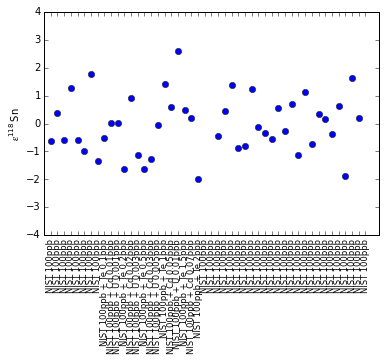

In [133]:
x = range(1, len(epsilon_comp["sample"])+1)
plot(x, epsilon_comp["112/120"], marker="o", ls="none")
ylim([-4, 4])
xticks(x, epsilon_comp["sample"], size='small', rotation=90)
ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [7]:
df_all.to_csv(path_sav + "Sn_H8_L4_2_cycles_NU_Signals_zero_corr.csv", mode='a', header=False)

In [195]:
df_internal_sub.to_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm.csv", mode='a', header=False)

In [42]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_mean_rel_to_120__116_120_no_bgd_corr_mad.csv", mode='w', header=True)

In [1226]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

In [986]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [987]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [1088]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [1089]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date") 

In [1182]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 20:49:00,0.0298238495726,0.0201845997439,0.0103681594438,0.446,0.235295696368,0.742939518097,0.263445942562,0.142086185109,0.177571556759,10.1619395381,SPEX1 100ppb
2014-10-07 21:07:00,0.0298270855009,0.0201887834143,0.0103664239291,0.446,0.235295260593,0.742937654621,0.263447680516,0.14208571056,0.177573088542,10.2834847296,SPEX1 100ppb
2014-10-07 21:29:00,0.0298241010738,0.0201850728708,0.0103667030734,0.446,0.235295046713,0.742937732217,0.263449417694,0.142085954225,0.17757007419,10.0068814188,SPEX1 100ppb
2014-10-07 21:46:00,0.0298269719657,0.0201827454973,0.0103676568054,0.446,0.235297077525,0.742936157145,0.263450048386,0.142089277895,0.177573191934,10.1732362802,SPEX1 100ppb
2014-11-18 18:22:00,0.0298319477344,0.0201968060654,0.0103609914838,0.446,0.235308007067,0.74295144542,0.263456437295,0.142073025422,0.17753393783,11.9205622223,NIST 100ppb
2014-11-18 18:27:00,0.0298302415426,0.0202014506204,0.0103609667001,0.446,0.235304600881,0.742949759778,0.263451222795,0.142074064497,0.177531032284,11.8435340427,NIST 100ppb
2014-11-18 18:31:00,0.029834566445,0.0202024281122,0.0103608586407,0.446,0.235309236679,0.742955467382,0.263452936054,0.142073215452,0.177533064574,11.3634385069,NIST 100ppb
2014-11-18 18:36:00,0.0298236482085,0.0201946006554,0.0103617565758,0.446,0.235308318118,0.742946848523,0.263449990275,0.142074569672,0.177530832831,11.5416992302,NIST 100ppb
2014-11-18 18:40:00,0.0298227478429,0.0201921659888,0.0103615705949,0.446,0.235307461611,0.742950591745,0.263450041891,0.142075223065,0.177536326791,11.6314409578,NIST 100ppb


In [1183]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 18:49:00,0.029824,0.020185,0.010368,0.446,0.235296,0.742940,0.263446,0.142086,0.177572,10.161940,SPEX1 100ppb
2014-10-07 19:07:00,0.029827,0.020189,0.010366,0.446,0.235295,0.742938,0.263448,0.142086,0.177573,10.283485,SPEX1 100ppb
2014-10-07 19:29:00,0.029824,0.020185,0.010367,0.446,0.235295,0.742938,0.263449,0.142086,0.177570,10.006881,SPEX1 100ppb
2014-10-07 19:46:00,0.029827,0.020183,0.010368,0.446,0.235297,0.742936,0.263450,0.142089,0.177573,10.173236,SPEX1 100ppb
2014-11-18 17:22:00,0.029832,0.020197,0.010361,0.446,0.235308,0.742951,0.263456,0.142073,0.177534,11.920562,NIST 100ppb
2014-11-18 17:27:00,0.029830,0.020201,0.010361,0.446,0.235305,0.742950,0.263451,0.142074,0.177531,11.843534,NIST 100ppb
2014-11-18 17:31:00,0.029835,0.020202,0.010361,0.446,0.235309,0.742955,0.263453,0.142073,0.177533,11.363439,NIST 100ppb
2014-11-18 17:36:00,0.029824,0.020195,0.010362,0.446,0.235308,0.742947,0.263450,0.142075,0.177531,11.541699,NIST 100ppb
2014-11-18 17:40:00,0.029823,0.020192,0.010362,0.446,0.235307,0.742951,0.263450,0.142075,0.177536,11.631441,NIST 100ppb


In [1184]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [1220]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-11-18 18:54:00,-1.295126,-1.053575,1.608025,1.998401e-11,-1.180555,-0.463371,-0.356364,0.722133,2.010156,1309.494419,SPEX 100ppb
2014-12-06 22:37:00,-4.936059,-7.445774,1.331682,1.998401e-11,0.786625,0.539985,1.003885,0.222717,0.767402,-1614.119882,SPEX 100ppb
2014-12-06 22:52:00,-1.620072,-3.896472,0.536870,1.998401e-11,0.533814,0.527568,1.004705,0.469725,1.664357,-1804.778746,SPEX 100ppb
2014-12-06 23:08:00,-2.641746,-4.386719,2.125820,1.998401e-11,0.522416,0.475452,0.892735,0.462190,1.555222,-1848.039153,SPEX 100ppb
2014-12-06 23:23:00,-3.243182,-3.908338,-0.299309,1.998401e-11,0.613841,0.489401,0.951723,0.466426,1.660720,-1728.263406,SPEX 100ppb
2014-12-06 23:39:00,-3.174104,-5.626922,2.187946,1.998401e-11,0.711496,0.500329,0.913301,0.302836,1.500547,-1512.382276,SPEX 100ppb
2014-12-06 23:54:00,-2.499252,-3.686348,3.196847,1.998401e-11,0.532245,0.565307,0.943385,0.268384,1.570411,-1442.654967,SPEX 100ppb
2014-12-07 00:09:00,-3.167063,-4.997893,0.608021,1.998401e-11,0.745353,0.520016,1.039127,0.455542,1.559710,-1523.698889,SPEX 100ppb
2014-12-07 00:25:00,-2.027759,-4.105014,2.820000,1.998401e-11,0.605650,0.507195,0.913818,0.470145,1.538801,-1719.373397,SPEX 100ppb


In [1222]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample
0,-4.252887,1.76055,-2.836398,1.998401e-11,0.6046,0.052729,-0.550984,0.411199,1.946529,Lee et al. (1995)
